In [3]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_watermark_score(df: pd.DataFrame):
    """
    Plots the watermark score from the DataFrame over the rows.

    :param df: A pandas DataFrame with a column named 'watermark_score'
    """
    if 'watermark_score' not in df.columns:
        raise ValueError("The DataFrame does not contain a 'watermark_score' column.")
    
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['watermark_score'], marker='o', linestyle='-', color='b')
    plt.title('Watermark Score Over Rows')
    plt.xlabel('Row Index')
    plt.ylabel('Watermark Score')
    plt.grid(True)
    plt.show()

def breakup_attacks(df):
    # Break the DF up into smaller DFs
    dfs = []
    current_df = None

    # Iterate over the rows and split on step_num resets
    for i, row in df.iterrows():
        # Check if the step_num resets to -1, indicating a new sequence
        if row['mutation_num'] == -1:
            if current_df is not None and not current_df.empty:
                dfs.append(current_df.reset_index(drop=True))  # Save the current increasing DF
            current_df = pd.DataFrame([row])  # Start a new DataFrame with the reset row
        else:
            # Append the row to the current DataFrame
            current_df = pd.concat([current_df, pd.DataFrame([row])])

    # Add the last DataFrame if it exists and is non-empty
    if current_df is not None and not current_df.empty:
        dfs.append(current_df.reset_index(drop=True))
    
    return dfs


In [4]:
df = pd.read_csv('/data2/borito1907/impossibility-watermark/attack_traces/good_embedder_DiffOracle_SemStamp_SentenceMutator_n-steps=100_attack_results_annotatedfix.csv')
dfs = breakup_attacks(df)

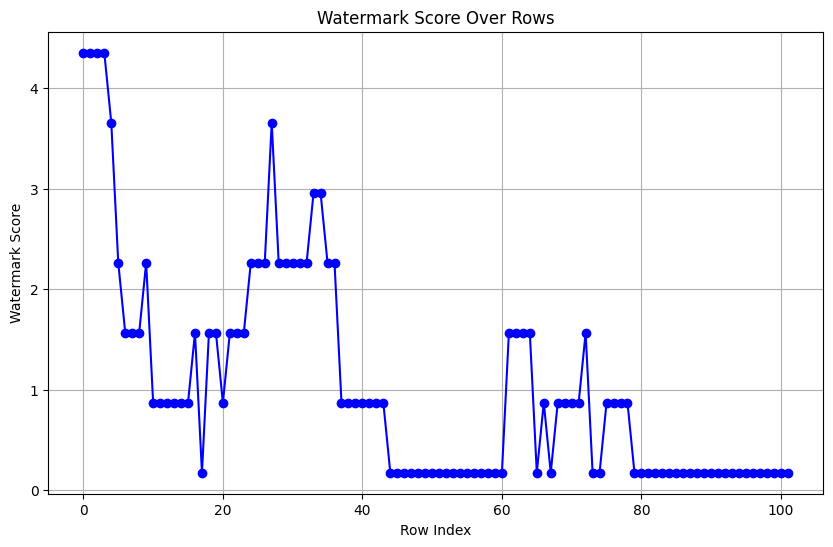

In [5]:
plot_watermark_score(dfs[0])

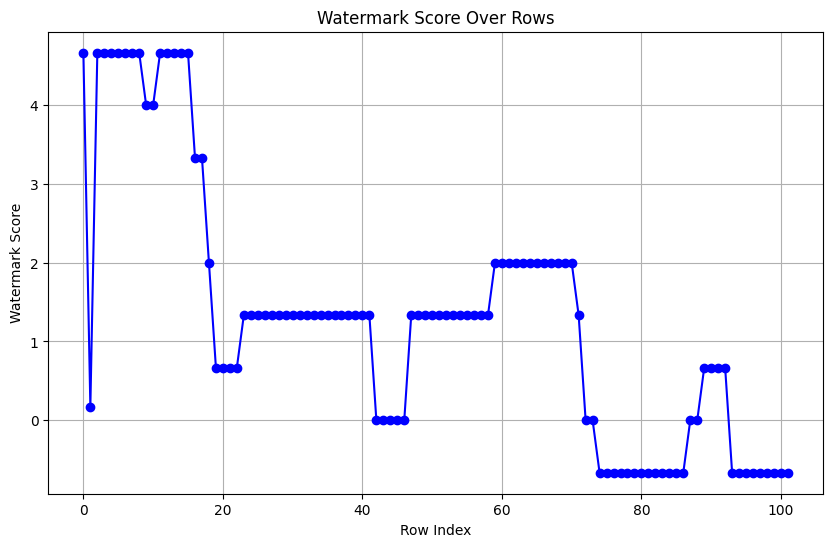

In [6]:
plot_watermark_score(dfs[1])

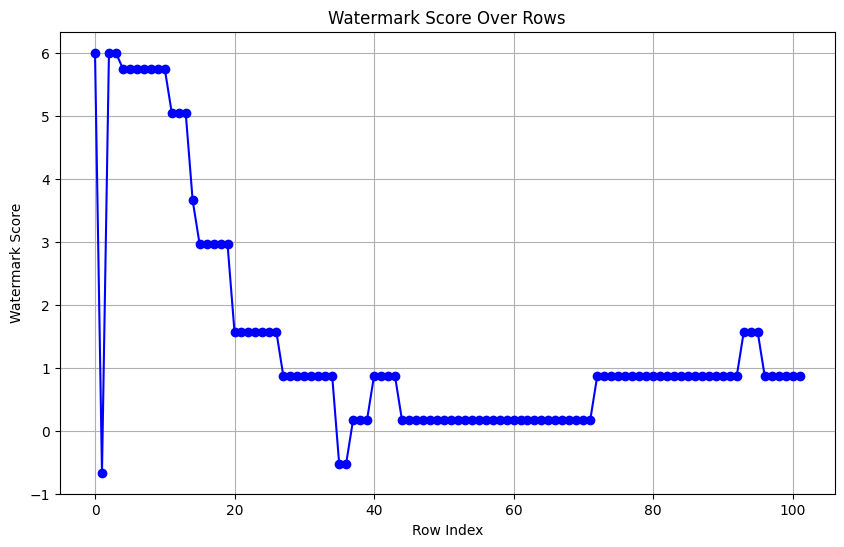

In [7]:
plot_watermark_score(dfs[2])

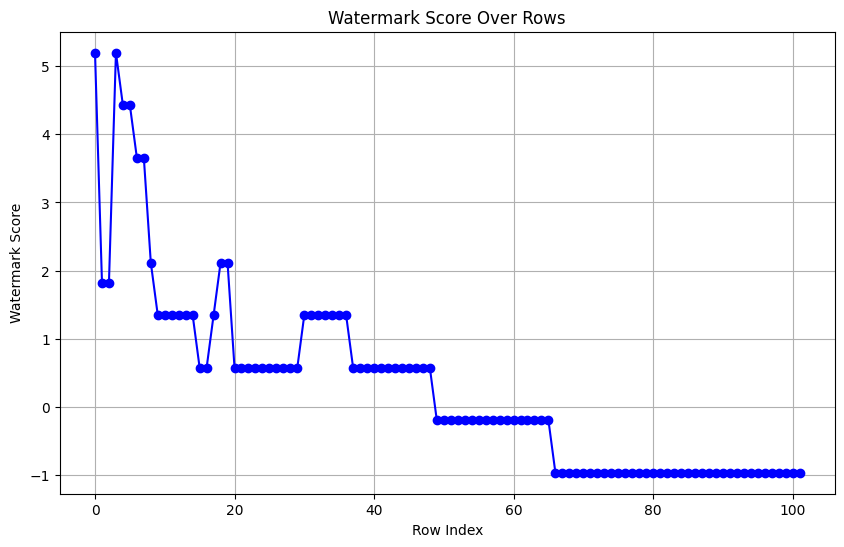

In [8]:
plot_watermark_score(dfs[4])

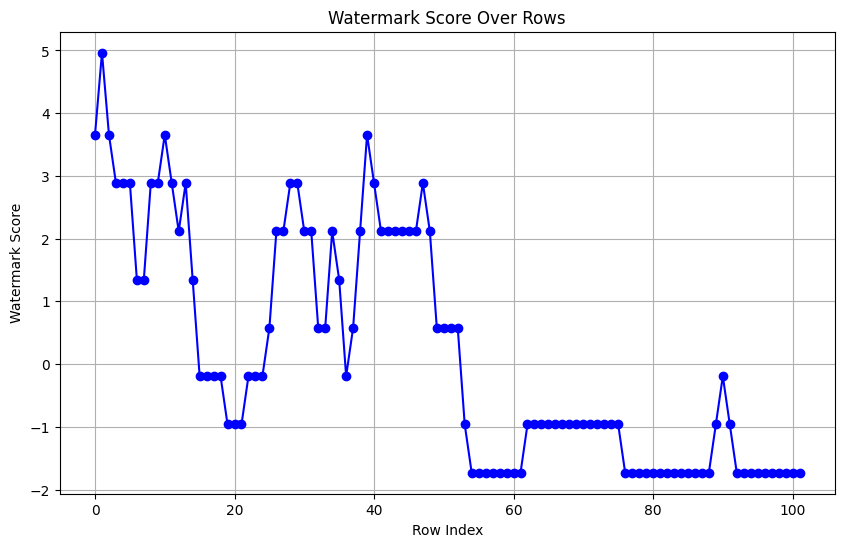

In [9]:
plot_watermark_score(dfs[10])

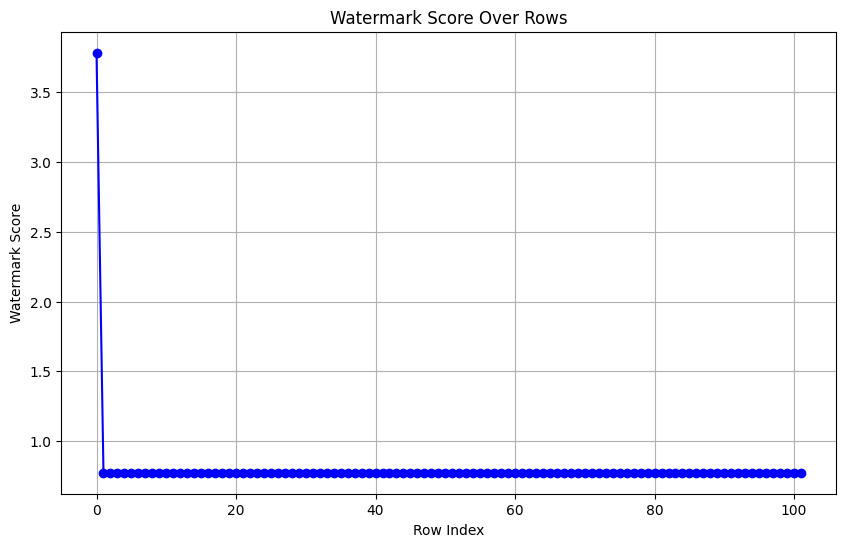

In [10]:
plot_watermark_score(dfs[13])

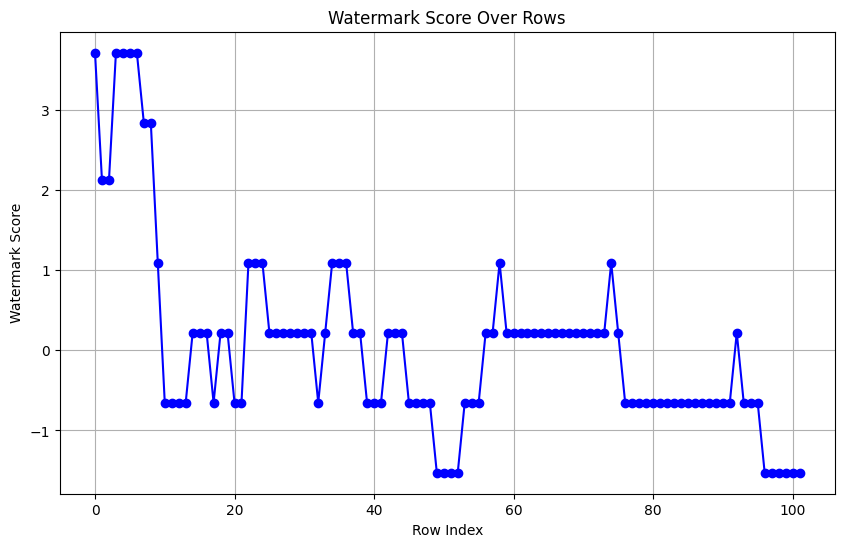

In [11]:
plot_watermark_score(dfs[16])

In [13]:
df = pd.read_csv('/data2/borito1907/impossibility-watermark/attack_traces/good_embedder_DiffOracle_SemStamp_SpanMutator_n-steps=200_attack_results_annotatedfix.csv')
dfs = breakup_attacks(df)

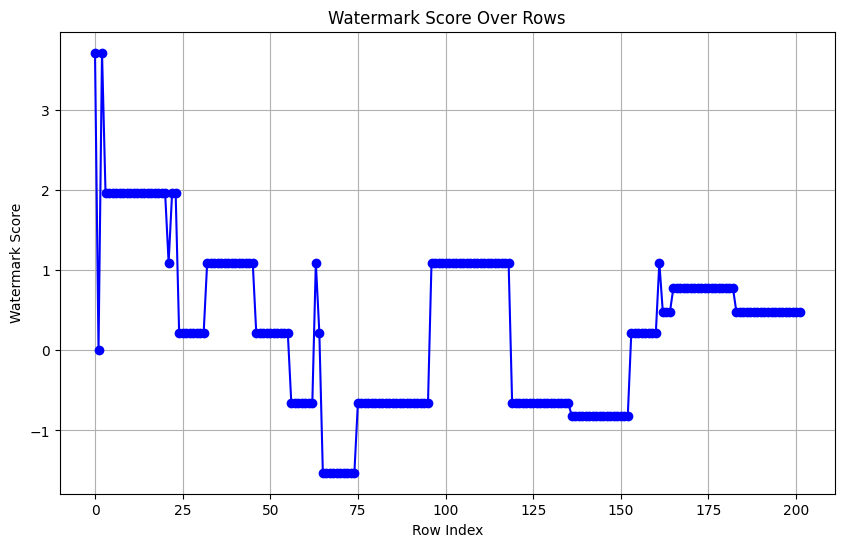

In [14]:
plot_watermark_score(dfs[16])

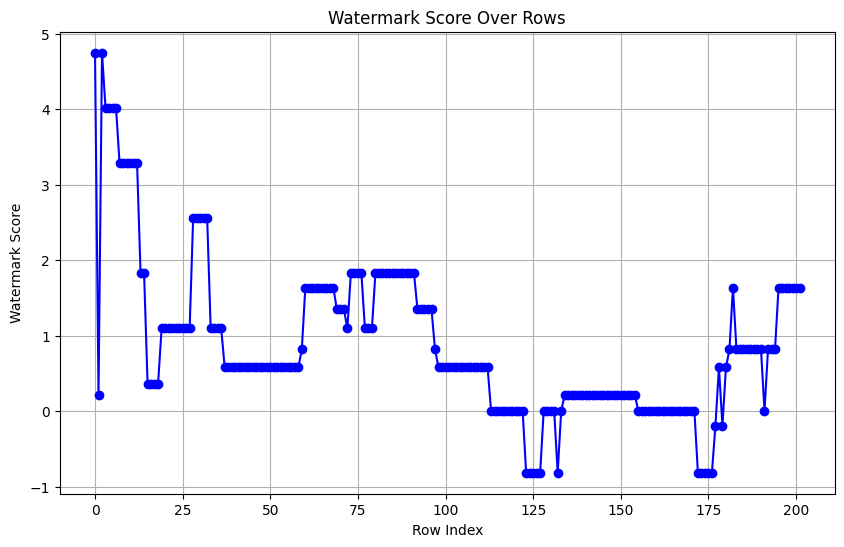

In [15]:
plot_watermark_score(dfs[11])

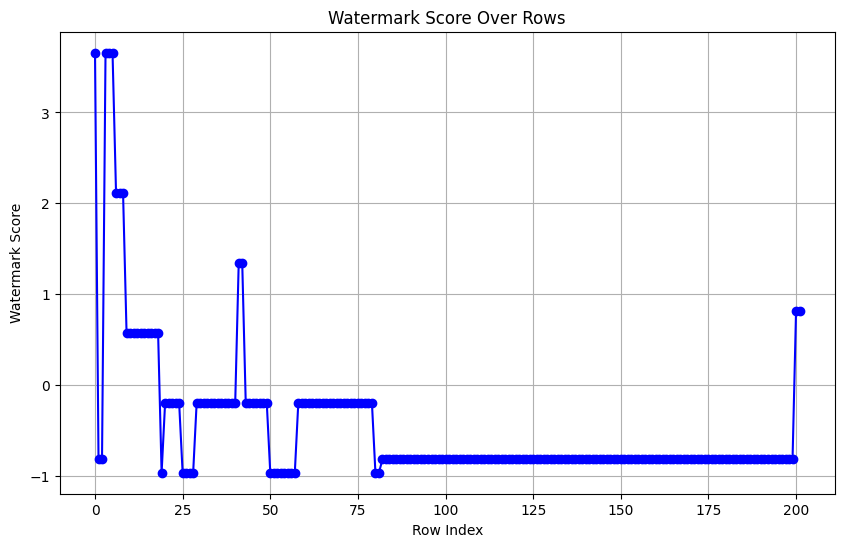

In [16]:
plot_watermark_score(dfs[7])